In [29]:
import numpy as np
import pandas as pd
import io
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/rayfin-ucsd/CSE151AGroupProject/main/USGovtRevCollect_20041001_20231227.csv'
df = pd.read_csv(url)

In [3]:
#81248 rows of data and 15 columns
df.shape

(81248, 15)

In [4]:
df.dtypes

Record Date                         object
Electronic Category Description     object
Channel Type Description            object
Tax Category Description            object
Net Collections Amount             float64
Electronic Category ID               int64
Channel Type ID                      int64
Tax Category ID                      int64
Source Line Number                   int64
Fiscal Year                          int64
Fiscal Quarter Number                int64
Calendar Year                        int64
Calendar Quarter Number              int64
Calendar Month Number                int64
Calendar Day Number                  int64
dtype: object

In [5]:
#Converting Record Date column to datetime objects.
df['Record Date'] = pd.to_datetime(df['Record Date'])

In [6]:
df

,Record Date,Electronic Category Description,Channel Type Description,Tax Category Description,Net Collections Amount,Electronic Category ID,Channel Type ID,Tax Category ID,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-12-27,Non-Electronic,Mail,Non-Tax,7.269500e+02,4,2,1,1,2024,1,2023,4,12,27
1,2023-12-27,Electronic Settlement,Over-the-Counter (OTC),Non-Tax,2.431048e+05,3,1,1,2,2024,1,2023,4,12,27
2,2023-12-27,Non-Electronic,Over-the-Counter (OTC),Non-Tax,9.395110e+06,4,1,1,3,2024,1,2023,4,12,27
3,2023-12-27,Fully Electronic - FS,Over-the-Counter (OTC),IRS Non-Tax,4.824105e+04,2,1,2,4,2024,1,2023,4,12,27
4,2023-12-27,Fully Electronic - All,Bank,IRS Tax,2.905820e+03,1,5,3,5,2024,1,2023,4,12,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81243,2004-10-01,Fully Electronic - All,Bank,IRS Tax,4.838831e+09,1,5,3,12,2005,1,2004,4,10,1
81244,2004-10-01,Non-Electronic,Bank,Non-Tax,2.114361e+06,4,5,1,1,2005,1,2004,4,10,1
81245,2004-10-01,Fully Electronic - All,Internet,Non-Tax,1.183413e+07,1,3,1,2,2005,1,2004,4,10,1
81246,2004-10-01,Fully Electronic - FS,Over-the-Counter (OTC),Non-Tax,1.921165e+06,2,1,1,3,2005,1,2004,4,10,1


In [7]:
df['Electronic Category Description'].unique()

array(['Non-Electronic', 'Electronic Settlement', 'Fully Electronic - FS',
       'Fully Electronic - All'], dtype=object)

In [8]:
df['Channel Type Description'].unique()

array(['Mail', 'Over-the-Counter (OTC)', 'Bank', 'Internet', 'Other'],
      dtype=object)

In [9]:
df['Tax Category Description'].unique()

array(['Non-Tax', 'IRS Non-Tax', 'IRS Tax'], dtype=object)

In [10]:
df['Electronic Category ID'].unique()

array([4, 3, 2, 1], dtype=int64)

In [11]:
df['Channel Type ID'].unique()

array([2, 1, 5, 3, 7], dtype=int64)

In [12]:
df['Tax Category ID'].unique()

array([1, 2, 3], dtype=int64)

In [13]:
df['Source Line Number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23], dtype=int64)

In [14]:
df['Fiscal Year'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005], dtype=int64)

In [15]:
df['Calendar Year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004], dtype=int64)

In [16]:
#No missing data
df.isnull().values.any()

False

In [17]:
#4834 unique days of records
df.groupby('Record Date').count()

,Electronic Category Description,Channel Type Description,Tax Category Description,Net Collections Amount,Electronic Category ID,Channel Type ID,Tax Category ID,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
Record Date,,,,,,,,,,,,,,
2004-10-01,17,17,17,17,17,17,17,17,17,17,17,17,17,17
2004-10-04,16,16,16,16,16,16,16,16,16,16,16,16,16,16
2004-10-05,17,17,17,17,17,17,17,17,17,17,17,17,17,17
2004-10-06,17,17,17,17,17,17,17,17,17,17,17,17,17,17
2004-10-07,16,16,16,16,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2023-12-21,14,14,14,14,14,14,14,14,14,14,14,14,14,14
2023-12-22,15,15,15,15,15,15,15,15,15,15,15,15,15,15


In [18]:
df

,Record Date,Electronic Category Description,Channel Type Description,Tax Category Description,Net Collections Amount,Electronic Category ID,Channel Type ID,Tax Category ID,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-12-27,Non-Electronic,Mail,Non-Tax,7.269500e+02,4,2,1,1,2024,1,2023,4,12,27
1,2023-12-27,Electronic Settlement,Over-the-Counter (OTC),Non-Tax,2.431048e+05,3,1,1,2,2024,1,2023,4,12,27
2,2023-12-27,Non-Electronic,Over-the-Counter (OTC),Non-Tax,9.395110e+06,4,1,1,3,2024,1,2023,4,12,27
3,2023-12-27,Fully Electronic - FS,Over-the-Counter (OTC),IRS Non-Tax,4.824105e+04,2,1,2,4,2024,1,2023,4,12,27
4,2023-12-27,Fully Electronic - All,Bank,IRS Tax,2.905820e+03,1,5,3,5,2024,1,2023,4,12,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81243,2004-10-01,Fully Electronic - All,Bank,IRS Tax,4.838831e+09,1,5,3,12,2005,1,2004,4,10,1
81244,2004-10-01,Non-Electronic,Bank,Non-Tax,2.114361e+06,4,5,1,1,2005,1,2004,4,10,1
81245,2004-10-01,Fully Electronic - All,Internet,Non-Tax,1.183413e+07,1,3,1,2,2005,1,2004,4,10,1
81246,2004-10-01,Fully Electronic - FS,Over-the-Counter (OTC),Non-Tax,1.921165e+06,2,1,1,3,2005,1,2004,4,10,1


In [19]:
df.groupby('Electronic Category Description').count()[['Record Date']].rename(columns = {'Record Date': 'Count'})

,Count
Electronic Category Description,
Electronic Settlement,12466
Fully Electronic - All,31609
Fully Electronic - FS,14129
Non-Electronic,23044


In [20]:
df.groupby('Channel Type Description').count()[['Record Date']].rename(columns = {'Record Date': 'Count'})

,Count
Channel Type Description,
Bank,12443
Internet,13911
Mail,20345
Other,66
Over-the-Counter (OTC),34483


In [21]:
df.groupby('Tax Category Description').count()[['Record Date']].rename(columns = {'Record Date': 'Count'})

,Count
Tax Category Description,
IRS Non-Tax,18545
IRS Tax,24843
Non-Tax,37860


In [22]:
df.groupby('Fiscal Year').count()[['Record Date']].rename(columns = {'Record Date': 'Count'})

,Count
Fiscal Year,
2005,4701
2006,5003
2007,5255
2008,4810
2009,4546
2010,4449
2011,4742
2012,4656
2013,4497


In [24]:
df.groupby('Fiscal Year')[['Net Collections Amount']].sum()

,Net Collections Amount
Fiscal Year,
2005,2.651425e+12
2006,2.921450e+12
2007,3.109482e+12
2008,3.191062e+12
2009,2.855280e+12
2010,2.935275e+12
2011,3.062801e+12
2012,3.158251e+12
2013,3.562188e+12


In [25]:
df.groupby('Electronic Category Description')[['Net Collections Amount']].sum()

,Net Collections Amount
Electronic Category Description,
Electronic Settlement,5.683999e+12
Fully Electronic - All,6.248116e+13
Fully Electronic - FS,6.513066e+11
Non-Electronic,4.469666e+12


In [26]:
df.groupby('Channel Type Description')[['Net Collections Amount']].sum()

,Net Collections Amount
Channel Type Description,
Bank,1.574290e+13
Internet,4.660688e+13
Mail,8.189791e+12
Other,2.569657e+07
Over-the-Counter (OTC),2.746536e+12


In [27]:
df.groupby('Tax Category Description')[['Net Collections Amount']].sum()

,Net Collections Amount
Tax Category Description,
IRS Non-Tax,2.529981e+09
IRS Tax,6.110596e+13
Non-Tax,1.217764e+13


<Axes: >

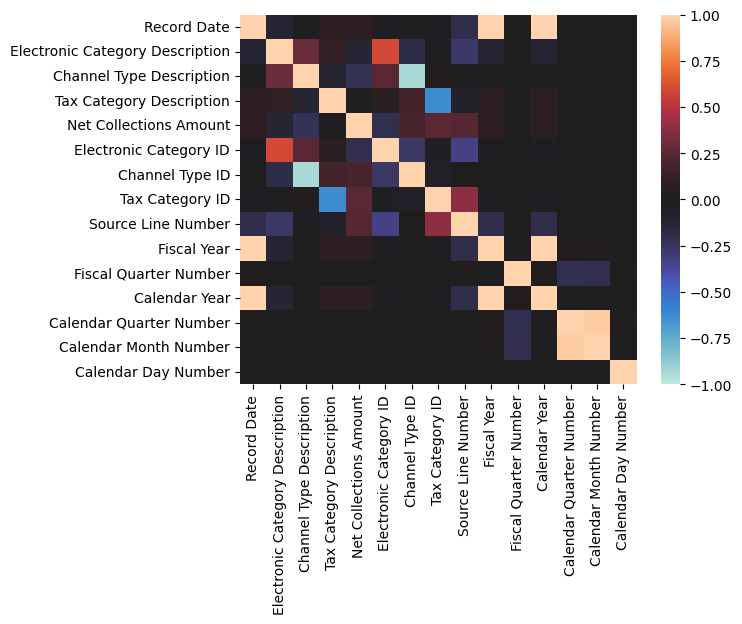

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

categoricalCols = ['Tax Category Description', 'Channel Type Description', 'Electronic Category Description']


labelConverted = df.apply(lambda x: LabelEncoder().fit_transform(df[x.name]) if (x.name in categoricalCols) else x) 

sns.heatmap(labelConverted.corr(), vmin=-1, vmax=1, center=0)

<Axes: xlabel='Record Date', ylabel='Net Collections Amount'>

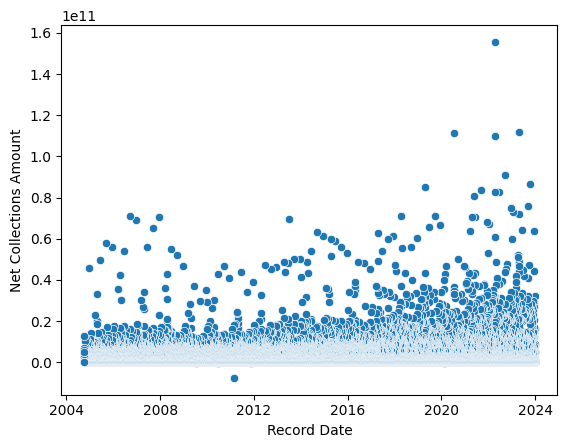

In [31]:
sns.scatterplot(x=df['Record Date'], y=df['Net Collections Amount'])